In [28]:
#imports 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Score'}>]], dtype=object)

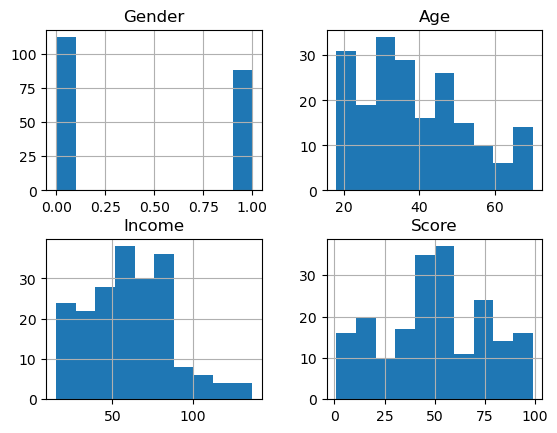

In [12]:
df = pd.read_csv("Mall_Customers.csv")

df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, inplace=True)

df.drop(['CustomerID'], axis = 1, inplace=True)

df['Gender'] = pd.Categorical(df['Gender']).codes.astype('int64')

df.hist()

In [13]:
df['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

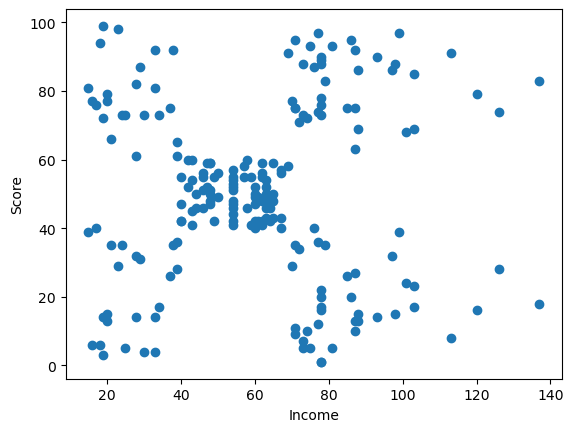

In [14]:
x = df['Income']
y = df['Score']
plt.scatter(x, y)
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [15]:
df.drop(['Gender'], axis = 1).corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


In [19]:
male_income = df.query('Gender == 1')['Income']
female_income = df.query('Gender == 0')['Income']

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bfd83db690>,
 'cmeans': <matplotlib.collections.LineCollection at 0x1bfdd54fc50>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bfdd4f2090>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bfdcbd8850>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bfdd5614d0>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x1bfdd21b810>}

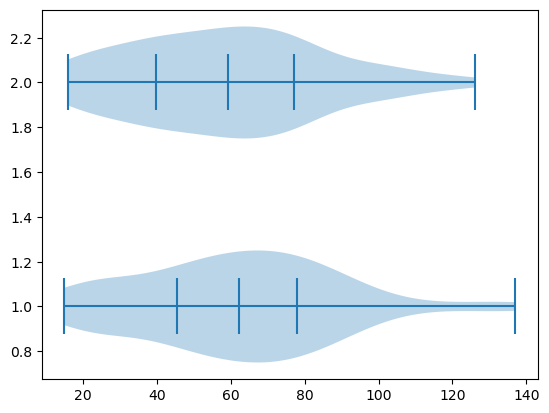

In [20]:
plt.violinplot([male_income, female_income], showmeans=True, quantiles=[[0.25, 0.75], [0.25, 0.75]], vert = False)

<Axes: >

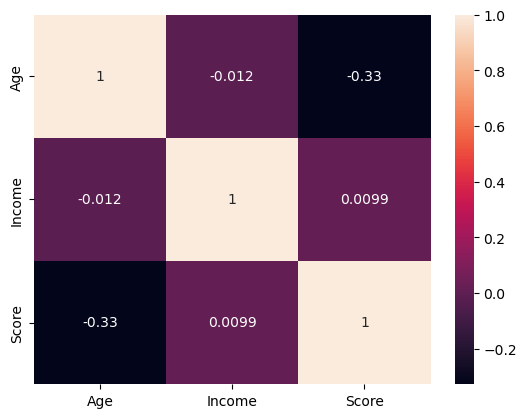

In [21]:
corr = df.drop(['Gender'], axis = 1).corr()
sns.heatmap(corr, annot = True)

<Axes: >

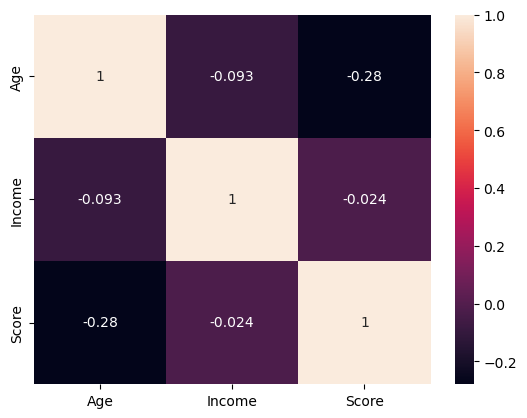

In [24]:
corr_male = df.query('Gender == 1').drop(['Gender'], axis = 1).corr()
sns.heatmap(corr_male, annot = True)

<Axes: >

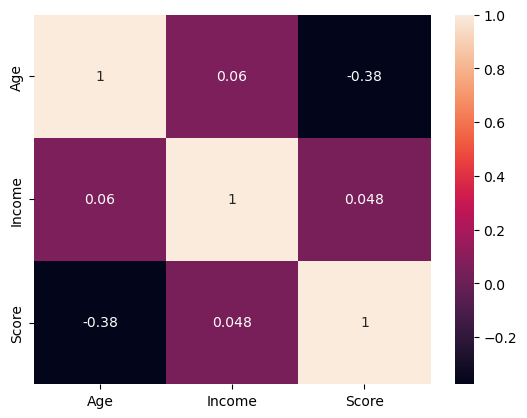

In [25]:
corr_female = df.query('Gender == 0').drop(['Gender'], axis = 1).corr()
sns.heatmap(corr_female, annot = True)

<Axes: >

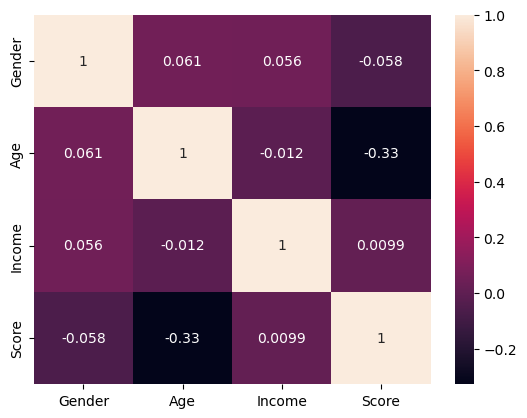

In [27]:
full_corr = df.corr()
sns.heatmap(full_corr, annot=True)

## K-Means

In [32]:
inertias = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

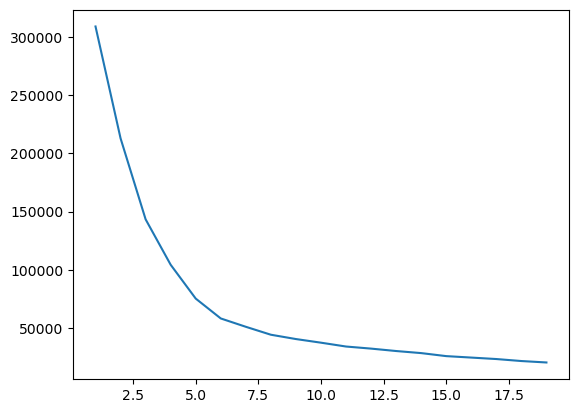

In [33]:
plt.plot(range(1, 20), inertias)
plt.show()

C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


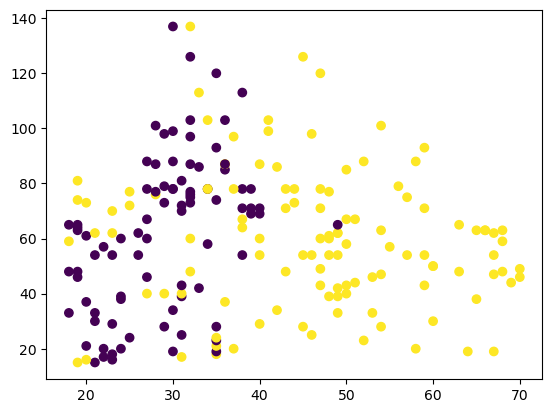

In [35]:
two_means = KMeans(n_clusters=2)
two_means.fit(df)
plt.scatter(df['Age'], df['Income'], c=two_means.labels_)